### K-means

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

In [2]:
from sklearn.cluster import KMeans

In [3]:
# create the blob centers
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])

# create blob initial cluster
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [4]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

<AxesSubplot:>

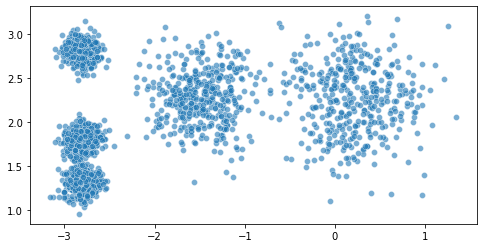

In [5]:
# plot blobs
plt.figure(figsize=(8,4))
sns.scatterplot(x=X[:,0], y=X[:,1], alpha=0.6)

In [6]:
# fit the Kmeans model and make predictions
k =5
kmeans = KMeans(n_clusters=5)
y_pred = kmeans.fit_predict(X)

In [7]:
y_pred # returns the cluster to which each instance was assigned

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [8]:
# predictions can be accessed by the labels_ attribute/ instance variable
y_pred is kmeans.labels_

True

In [9]:
# check the centroids positions
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [10]:
# assign new instances to the clusters
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

In [11]:
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

In [12]:
# get the distance between each instance and every centroid
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [13]:
kmeans.inertia_ # performance measure

211.59853725816828

In [14]:
kmeans.score(X) # performance measure (scikit learn's greater is better)

-211.5985372581683

#### Optimal number of clusters

Using the Elbow method

In [15]:
# get the inertia for each estimator based on number of cluster
# plot inertia x k-clusters
clusters = np.arange(1, 11, dtype=int)
models = [KMeans(n_clusters=k, random_state=42).fit(X) for k in clusters]

In [16]:
inertias = [model.inertia_ for model in models]
inertias

[3534.8360871670743,
 1149.6140723750257,
 653.2167190021557,
 261.79677785694713,
 211.59853725816828,
 169.23715382893596,
 141.3833648956852,
 119.1198341610289,
 102.59678718476394,
 92.49741483904648]

(1.0, 8.5, 0.0, 1500.0)

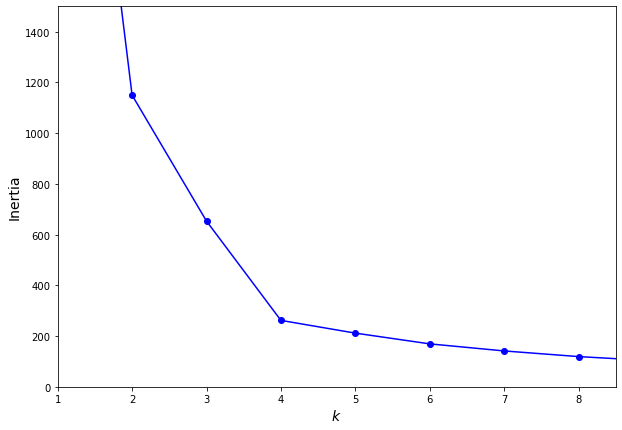

In [17]:
plt.figure(figsize=(10,7))
plt.plot(clusters, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 8.5, 0, 1500])

In [18]:
# using the silhouette method
from sklearn.metrics import silhouette_score

In [19]:
# calculate the silhouette_score for each k number of clusters
sil_scores = [silhouette_score(X, model.labels_) for model in models[1:]]
sil_scores

[0.5966442557582528,
 0.5723900247411775,
 0.688531617595759,
 0.655517642572828,
 0.6021101618281359,
 0.6068660656395705,
 0.5600381725018386,
 0.5668839323465226,
 0.5616692516951681]

(2.0, 8.5, 0.4, 0.7)

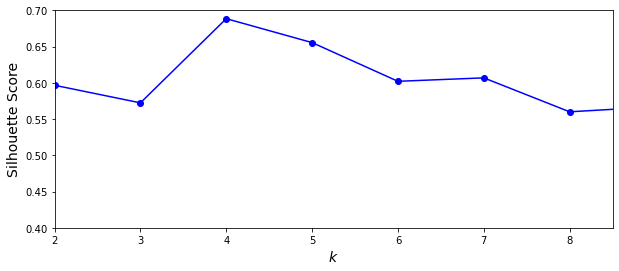

In [20]:
plt.figure(figsize=(10,4))
plt.plot(clusters[1:], sil_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.axis([2, 8.5, 0.4, 0.700])

We can see that the silhouette score confirms that the best option would be k=4. k=5 would also not be a bad choice depending on the objective of the clustering.
The elbow method only shows that the inertia goes down as we increase the number of clusters. It happens because the more centroids you have, the lower it will be the distance between examples and the centroids. The silhouette score is a more appropriate reference for deciding on the number of clusters

### Using Clustering for Image Segmentation

In [21]:
from PIL import Image
import requests
from io import BytesIO

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/images/unsupervised_learning/"
filename = "ladybug.png"


In [22]:
response = requests.get(DOWNLOAD_ROOT+filename)
img = Image.open(BytesIO(response.content))

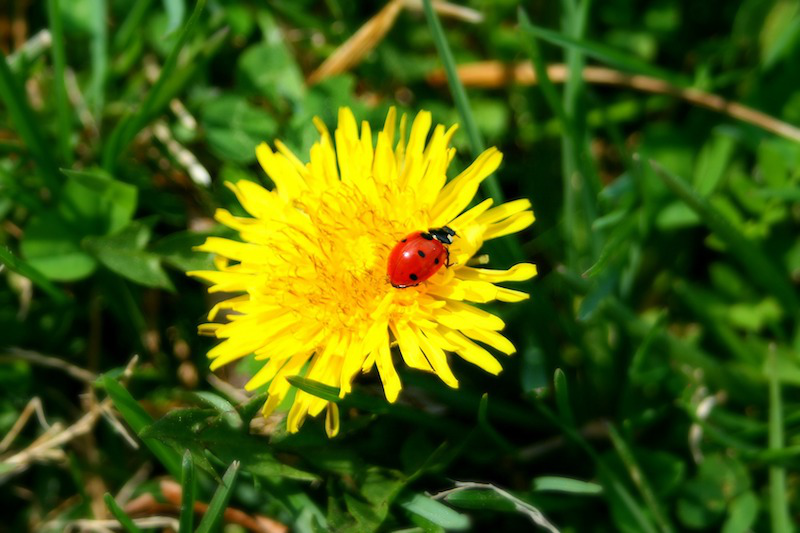

In [23]:
img

In [24]:
image = np.asarray(img)

In [25]:
image.shape

(533, 800, 3)

In [26]:
X = image.reshape(-1, 3)
X

array([[25, 29,  2],
       [24, 28,  1],
       [24, 29,  0],
       ...,
       [10, 58,  0],
       [ 5, 52,  0],
       [ 2, 48,  0]], dtype=uint8)

In [27]:
X.shape

(426400, 3)

In [28]:
kmeans = KMeans(n_clusters=8).fit(X)
seg_img = kmeans.cluster_centers_[kmeans.labels_]
seg_img = seg_img.reshape(image.shape)

In [29]:
kmeans.labels_, kmeans.labels_.shape

(array([1, 1, 1, ..., 3, 1, 1], dtype=int32), (426400,))

In [30]:
kmeans.cluster_centers_, kmeans.cluster_centers_.shape

(array([[ 56.35606809,  99.12714397,  15.0360447 ],
        [  5.8953718 ,  28.38685883,   1.48092464],
        [250.73199131, 238.19292864,   6.53675631],
        [ 25.8034209 ,  65.23098461,   4.3856326 ],
        [ 95.46231002, 133.74381283,  40.44608709],
        [156.29214303, 160.89230114,  99.36596935],
        [224.44790288, 183.81474023,   9.15672286],
        [194.93541442,  51.34158593,  11.14065303]]),
 (8, 3))

In [31]:
kmeans.cluster_centers_[kmeans.labels_], kmeans.cluster_centers_[kmeans.labels_].shape

(array([[ 5.8953718 , 28.38685883,  1.48092464],
        [ 5.8953718 , 28.38685883,  1.48092464],
        [ 5.8953718 , 28.38685883,  1.48092464],
        ...,
        [25.8034209 , 65.23098461,  4.3856326 ],
        [ 5.8953718 , 28.38685883,  1.48092464],
        [ 5.8953718 , 28.38685883,  1.48092464]]),
 (426400, 3))

In [37]:
seg_img = np.around(seg_img)

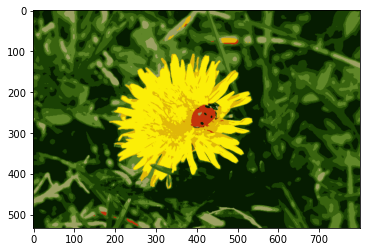

In [45]:
plt.imshow(seg_img.astype('uint8'))

In [39]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = np.around(kmeans.cluster_centers_[kmeans.labels_])
    segmented_imgs.append(segmented_img.reshape(image.shape))

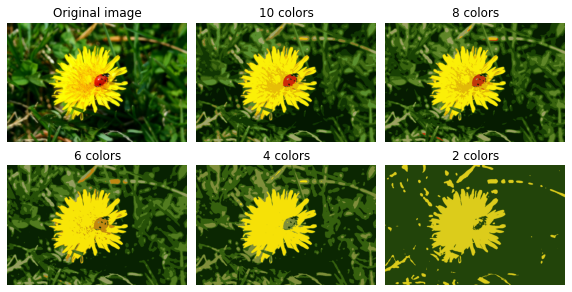

In [44]:

plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow((segmented_imgs[idx]).astype('uint8'))
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

### Using Clustering for Preprocessing

In [46]:
from sklearn.datasets import load_digits

In [47]:
X_digits, y_digits = load_digits(return_X_y=True)

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [55]:
from sklearn.linear_model import LogisticRegression

In [68]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [57]:
log_reg.score(X_test, y_test)

0.96

In [69]:
# build pipeline for preprocessing
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=50)), # images are 8x8 or 64D reducing it to 50D
    ('log_reg', LogisticRegression(max_iter=10000)) 
])

In [70]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression(max_iter=10000))])

In [71]:
pipeline.score(X_test, y_test)

0.9666666666666667

In [72]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = dict(kmeans__n_clusters=range(2, 100), log_reg__max_iter=[10000])
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

In [75]:
grid_clf.best_params_

{'kmeans__n_clusters': 55, 'log_reg__max_iter': 10000}

In [76]:
grid_clf.score(X_test, y_test)

0.9711111111111111

### Using Clustering for Semi-Supervised Learning

In [77]:
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

/Users/krustybr/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
log_reg.score(X_test, y_test) # lower score - less training data

0.84

In [79]:
k = 50
kmeans = KMeans(n_clusters=k)
# 50 clusters
X_digits_dist = kmeans.fit_transform(X_train)
# get the closest centroid to each instance
representative_digit_idx = np.argmin(X_digits_dist, axis=0) 

In [82]:
X_representative_digits = X_train[representative_digit_idx]

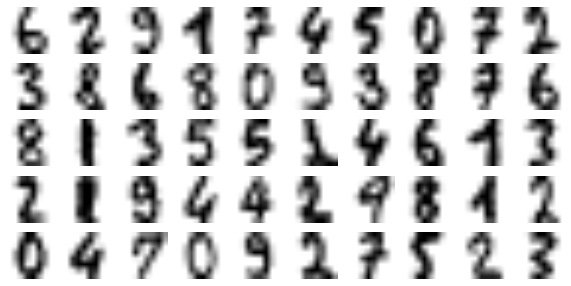

In [92]:
plt.figure(figsize=(10, 5))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

In [89]:
y_train[representative_digit_idx]

array([6, 2, 9, 1, 7, 4, 5, 0, 7, 2, 3, 8, 6, 8, 0, 9, 3, 8, 7, 6, 8, 1,
       3, 5, 5, 1, 4, 6, 1, 3, 2, 1, 9, 4, 4, 2, 9, 8, 1, 2, 0, 4, 7, 0,
       9, 2, 7, 5, 2, 3])

In [91]:
# manually labelling each number
y_representative_digits = np.array([
    6, 2, 9, 1, 7, 4, 5, 0, 7, 2,
    3, 8, 6, 8, 0, 9, 3, 8, 7, 6,
    8, 1, 3, 5, 5, 1, 4, 6, 1, 3,
    2, 1, 9, 4, 4, 2, 9, 8, 1, 2,
    0, 4, 7, 0, 9, 2, 7, 5, 2, 3
])

In [97]:
# measuring accuracy of the 50 most significant digits in relation to their clusters
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_representative_digits, y_representative_digits) # train on only the most representative digits of each class
log_reg.score(X_test, y_test)

0.9155555555555556

In [102]:
# label propagation
y_train_propagated = np.empty(X_train.shape[0], dtype=np.int32)

In [107]:
k = 50

for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [108]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

/Users/krustybr/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9222222222222223

In [122]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [123]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [124]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [125]:
log_reg.score(X_test, y_test)

0.9355555555555556